zzh做的一些数据处理工作，仅供参考


In [1]:
## 数据读入
import sys
sys.path.append("..")
import os
import pandas as pd
from tradingcalendar import Calendar

c = Calendar()
#基于20230601的数据分析
date = 20230601
print(date)
path = os.path.join("..", "dataset","csv", "{}.csv".format(date))
df = pd.read_csv(path)
df.head()

20230601


,symbol,interval,fret12,midpx,lastpx,open,high,low,bid0,ask0,...,nCxlBuy,cxlBuyQty,cxlBuyTurnover,cxlBuyHigh,cxlBuyLow,nCxlSell,cxlSellQty,cxlSellTurnover,cxlSellHigh,cxlSellLow
0,90000063,93000000,0.010716,34.995,NaN,NaN,NaN,NaN,34.99,35.00,...,0.0,0.0,0.00,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,90000063,93100000,0.008109,35.145,35.15,35.00,35.18,34.90,35.14,35.15,...,204.0,293963.0,10243005.89,35.17,31.66,77.0,155000.0,5529274.0,38.70,34.99
2,90000063,93200000,0.003972,35.245,35.26,35.14,35.30,35.08,35.23,35.26,...,283.0,597740.0,21001447.20,35.26,31.66,452.0,302100.0,10652583.0,38.46,35.10
3,90000063,93300000,0.004252,35.280,35.30,35.24,35.39,35.21,35.27,35.29,...,203.0,387100.0,13620642.00,35.33,33.00,115.0,80400.0,2849704.0,38.18,35.24
4,90000063,93400000,0.004682,35.240,35.23,35.29,35.35,35.19,35.23,35.25,...,157.0,89400.0,3139528.00,35.32,31.67,122.0,114500.0,4062647.0,38.00,35.25


In [5]:
# 分析变量和目标值的相关关系
# 选择感兴趣的列，第二列是'fret12'，所以从第三列开始
columns_of_interest = df.columns[3:]  

# 计算'fret12'与这些列的相关系数
correlations = {}
for column in columns_of_interest:
    correlations[column] = df['fret12'].corr(df[column])

# 输出数据到txt文件
with open( "corr-" + str(date) + '.txt', 'w') as f:
    max_key_length = 20
    for key, value in correlations.items():
        f.write(f'{key.ljust(max_key_length)}: {value}\n')


# 将结果转换为一个DataFrame，便于查看
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with fret12'])

df_sorted = correlation_df.sort_values(by='Correlation with fret12', ascending=False)
with open("corr-sort-" + str(date) +'.txt', 'w') as f:
    max_key_length = 20
    for key, value in df_sorted.items():
        f.write(f'{key.ljust(max_key_length)}: {value}\n')

print(correlation_df)

                   Correlation with fret12
midpx                             0.008734
lastpx                            0.007738
open                              0.007754
high                              0.007900
low                               0.007530
bid0                              0.008723
ask0                              0.008746
bid4                              0.008697
ask4                              0.008784
bid9                              0.008693
ask9                              0.008810
bid19                             0.008147
ask19                             0.008868
bsize0                           -0.003534
asize0                           -0.012268
bsize0_4                         -0.009196
asize0_4                         -0.011410
bsize5_9                         -0.009389
asize5_9                         -0.009729
bsize10_19                       -0.009297
asize10_19                       -0.013242
btr0_4                           -0.012259
atr0_4     

上面的分析均只是用了第一份数据，没使用额外的多余数据，现在把所有训练集的数据结合起来分析试试

In [6]:
#计算所有date的总计correlation
date_range = c.range(20230601, 20231130)
#
correlations = {}
record_nAddBuy = []
for column in columns_of_interest:
    correlations[column] = 0
for date in date_range:
    path = os.path.join("..","dataset", "csv", "{}.csv".format(date))
    df = pd.read_csv(path)
    columns_of_interest = df.columns[3:]  
    for column in columns_of_interest:
        tmp = df['fret12'].corr(df[column])
        correlations[column] = correlations[column]+tmp
        if(column=="nAddBuy"):
            record_nAddBuy.append(tmp)
            

    
for column in columns_of_interest:
        correlations[column] = correlations[column]/len(date_range)

df_all = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with fret12'])
df_all_sort = df_all.sort_values(by='Correlation with fret12', ascending=False)
#输出
with open('correlation-all-sort.txt', 'w') as f:
    # 迭代字典的键值对
    max_key_length = 20
    for key, value in df_all_sort.items():
        # 写入每个键值对到文件中
        f.write(f'{key.ljust(max_key_length)}: {value}\n')
print(df_all)


                   Correlation with fret12
midpx                            -0.005386
lastpx                           -0.005328
open                             -0.005296
high                             -0.005307
low                              -0.005331
bid0                             -0.005386
ask0                             -0.005386
bid4                             -0.005368
ask4                             -0.005373
bid9                             -0.005351
ask9                             -0.005376
bid19                            -0.005349
ask19                            -0.005358
bsize0                            0.003709
asize0                           -0.003917
bsize0_4                          0.000824
asize0_4                         -0.001589
bsize5_9                         -0.001706
asize5_9                         -0.000799
bsize10_19                       -0.003063
asize10_19                       -0.001620
btr0_4                            0.001510
atr0_4     

In [7]:
# 把全部数据的corre平均值导出
print(len(date_range))

with open('correlation-all.txt', 'w') as f:
    # 迭代字典的键值对
    max_key_length = 20
    for key, value in correlations.items():
        # 写入每个键值对到文件中
        f.write(f'{key.ljust(max_key_length)}: %.6f\n' % value)

123


In [8]:
print(record_nAddBuy)
with open("recore_nAddBuy.txt","w") as f:
    for a in record_nAddBuy:
        f.write(f'%.6f\n' %a)


[0.09608579731905761, 0.006825137156379704, 0.03418174695455439, 0.06874599749941286, 0.07588769734770995, 0.005002694134661343, 0.02444200817259907, 0.04240910772918483, 0.07685725794002593, 0.0015977801425810798, 0.060975649337844495, 0.036724939532247695, 0.049010365314868846, -0.015350068664321754, -0.07245033356737247, -0.05188496402076912, -0.02725831813968365, -0.1330369778101453, 0.017201806987551124, 0.03284886263673678, -0.07456115123456185, 0.03457719416199051, 0.06067202486786327, 0.08544043375047118, -0.09886658121827518, -0.007612680582981181, -0.012303227065372686, 0.050714016621570664, -0.004086318755127506, 0.048160422759699964, 0.041711025175579994, 0.02017469286363344, -0.04909572934192437, -0.0373938902264686, 0.05187152741190875, 0.1035611874859473, 0.03408377505980388, -0.06765096781531744, 0.054078433708306554, 0.011516253859017127, 0.10116090866400072, -0.020964917638243766, 0.024969110035982726, 0.11437496054640667, 0.013548590951175884, 0.0068801408203149365, 

max-min归一化并不会改变相关系数。下面的代码证实了这一点。

In [10]:
# 试试把数据映射到0-1区间，再进行相关性分析
# 似乎不影响
file = "20230601"
df = pd.read_csv("../dataset/csv/" + file + ".csv");
df_std = pd.DataFrame()
dict = {}
columns_for_corr = df.columns[3:]
for column_name in columns_for_corr:
    df_std[column_name ] = (df[column_name]-df[column_name].min())/(df[column_name].max()-df[column_name].min())

correlations = {}

for column_name in columns_of_interest:
    correlations[column_name] = df["fret12"].corr(df_std[column_name])

# 输出数据到txt文件-无排序
with open( "corr-std-" + file + '.txt', 'w') as f:
    max_key_length = 20
    for key, value in correlations.items():
        f.write(f'{key.ljust(max_key_length)}: {value}\n')




In [11]:
# 造特征 df["buyVwad"]/df["sellVwad"]
# df_feature = pd.DataFrame()
import numpy as np
import pandas as pd
date_range = c.range(20230601, 20231130)
corr = 0

record = []
record1 = []
record2 = []

for date in date_range:
    file = str(date)
    path = "../dataset/csv/" + file + ".csv"
    df = pd.read_csv(path)
    # tmp = df["fret12"].corr(df["buyVwad"]/df["sellVwad"])
    col = df["buyVwad"]/df["sellVwad"]
    tmp  = df["fret12"].corr(col)
    tmp1 = df["fret12"].corr(np.log(col))
    tmp2 = df["fret12"].corr(np.log10(col))
    record.append(tmp)
    record1.append(tmp1)
    record2.append(tmp2)
    # corr += df["fret12"].corr(df["buyVwad"]/df["sellVwad"])

print(record)
print(record1)
print(record2)
corr = sum(record)/len(record)
# log2和log10的corr一样，是因为log2(x)和log10(x)正向关
corr1 = sum(record1)/len(record1)
corr2 = sum(record2)/len(record2)

print(corr)
print(corr1)
print(corr2)


[-8.621977840898771e-05, 0.0029667630588642527, 0.0014403124386308855, 0.003157985649448914, 0.0018275579832850582, -0.00011644550650308046, 0.004089080440415471, 0.006574540108550892, 0.0008703544131650915, 0.0006800910366690897, 0.0019319702367059505, 0.00035791277334724144, 0.0006219313009803703, 0.0021880871979310375, 0.0042158475869259445, 0.002829738825900218, 0.005013361557600741, 0.004497252309233898, -0.0011463759372609124, 0.00039002380184055525, 0.004295607364339335, 0.00046520346729977177, 5.851686171873941e-06, 0.00020554409569913148, 0.003914871591365775, 0.002042697542669397, 0.0021529210944585824, 0.0002014454396203404, 9.451271909977835e-05, 0.0009463728978576056, 0.0003335227597209599, 0.0014158425331626213, 0.006304019531200405, 0.0008841195452108573, -0.0003223382790076716, 0.0007131014922669551, -8.972094639148946e-05, 0.0016304142183214418, 0.002294536708404655, -0.0014940080016362597, -0.0011208131422134346, 0.007632274644881319, 0.0017487990056959234, 0.00039958

In [12]:

print(record)
with open('test.txt', 'w') as f:
    for value in record:
        # 写入每个键值对到文件中
        f.write(f'%.6f\n' % value)

[-8.621977840898771e-05, 0.0029667630588642527, 0.0014403124386308855, 0.003157985649448914, 0.0018275579832850582, -0.00011644550650308046, 0.004089080440415471, 0.006574540108550892, 0.0008703544131650915, 0.0006800910366690897, 0.0019319702367059505, 0.00035791277334724144, 0.0006219313009803703, 0.0021880871979310375, 0.0042158475869259445, 0.002829738825900218, 0.005013361557600741, 0.004497252309233898, -0.0011463759372609124, 0.00039002380184055525, 0.004295607364339335, 0.00046520346729977177, 5.851686171873941e-06, 0.00020554409569913148, 0.003914871591365775, 0.002042697542669397, 0.0021529210944585824, 0.0002014454396203404, 9.451271909977835e-05, 0.0009463728978576056, 0.0003335227597209599, 0.0014158425331626213, 0.006304019531200405, 0.0008841195452108573, -0.0003223382790076716, 0.0007131014922669551, -8.972094639148946e-05, 0.0016304142183214418, 0.002294536708404655, -0.0014940080016362597, -0.0011208131422134346, 0.007632274644881319, 0.0017487990056959234, 0.00039958

In [ ]:
# 造特征 df["nCxlSell"]/df["nCxlBuy"]
# 考虑log
import numpy as np
import pandas as pd
import matplotlib as mp
import sys
sys.path.append("..")
import os
from tradingcalendar import Calendar

c = Calendar()
date_range = c.range(20230601, 20231130)
corr = 0
record = []
record1 = []

for date in date_range:
    file = str(date)
    path = "../dataset/csv" + file + ".csv"
    df = pd.read_csv(path)
    # tmp = df["fret12"].corr(df["buyVwad"]/df["sellVwad"])
    
    df["nCxlSell"] = df["nCxlSell"].fillna(1)
    col = df["nCxlSell"]/df["nCxlBuy"]
    col = col.fillna(1)
    col = col.replace(np.inf,1)
    col[col<1] = 1
    # print(col)
    tmp  = df["fret12"].corr(col)
    tmp1 = df["fret12"].corr(np.log(col))

    record.append(tmp)
    record1.append(tmp1)

print(record)
print(record1)
corr = sum(record)/len(record)
corr1 = sum(record1)/len(record1)

print(corr)
print(corr1)


[-0.001487737103252445, 0.011343445632243501, -0.0011507449619167877, 0.010939645010379737, 0.01181797220770098, -0.004723748567307199, -0.014915193641634848, 0.0024482526336535647, 0.010481258036842135, 0.0019945989478817538, 0.007130033481345691, 0.002319535342448386, 0.01652261192466499, 0.005913666208031818, 0.006664302280969668, 0.00023782110622839382, 0.005833638607350029, -0.01695584851368413, 0.008114060370791971, 0.01343456080811148, -0.004431105013085061, 0.01069398074461619, 0.011816698541882505, 0.0020796846566963592, -0.005849179335793331, 0.005186833598264502, 0.007745044027851004, 0.0024141204560876213, 0.007634834531231818, 0.018114407498782154, 0.00304706188555509, 0.007074448787718321, 0.0011649627587650578, 0.005143889343447938, -0.0008011913408844337, 0.012852050677148117, 0.0016697278980701265, -0.004763114209053667, -0.006385108767411356, -0.004101604083699045, 0.003154353123754122, 0.00516480712473674, 0.022289813534564367, -0.0025479462325084393, 0.0095189967238

In [14]:
#枚举所有的属性 A/B B/A log(A/B) log(B/A)
import numpy as np
import pandas as pd
import matplotlib as mp
import sys
sys.path.append("..")
import os
from tradingcalendar import Calendar

c = Calendar()
date_range = c.range(20230601, 20231130)
for date in date_range:
    path = "../dataset/csv/" + str(date) + ".csv"
    
    df = pd.read_csv(path)


In [ ]:
len(date_range)

123

In [4]:
#枚举所有的属性 A/B B/A log(A/B) log(B/A)
import numpy as np
import pandas as pd
import matplotlib as mp
import sys
sys.path.append("..")
import os
from tradingcalendar import Calendar
c = Calendar()
corr = {}
###
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
df = pd.read_csv(path)
column_name = df.columns[3:]
for i in range(len(column_name)):
        for j in range(i + 1, len(column_name)):
            corr[column_name[i] + "-"  + column_name[j]] = 0
            corr[column_name[j] + "-"  + column_name[i]] = 0
            corr["log-" + column_name[i] + "-"  + column_name[j]] = 0
            corr["log-" + column_name[j] + "-"  + column_name[i]] = 0
###

date_range = c.range(20230601, 20231130)
for date in date_range:
    path = "../dataset/csv/" + str(date) + ".csv"
    df = pd.read_csv(path)
    column_name = df.columns[3:]

    df = df.fillna(1)
    # df = df.clip(lower=1)
    for col in df.columns[3:]:
        df.loc[df[col] < 1, col] = 1

    for i in range(len(column_name)):
        for j in range(i + 1, len(column_name)):
            # print(column_name[i],"-",column_name[j])
            feature1 = df[column_name[i]] / df[column_name[j]]
            feature2 = df[column_name[j]] / df[column_name[i]]
            # 异常值处理
            feature1 = feature1.fillna(1)
            feature1 = feature1.replace(np.inf,1)
            feature2 = feature2.fillna(1)
            feature2 = feature2.replace(np.inf,1)
            
            #corr计算
            corr[column_name[i] + "-"  + column_name[j]] = df["fret12"].corr(feature1) + corr[column_name[i] + "-"  + column_name[j]]
            corr[column_name[j] + "-"  + column_name[i]] = df["fret12"].corr(feature2) + corr[column_name[j] + "-"  + column_name[i]]
            corr["log-" + column_name[i] + "-"  + column_name[j]] = df["fret12"].corr(np.log(feature1)) + corr["log-" + column_name[i] + "-"  + column_name[j]]
            corr["log-" + column_name[j] + "-"  + column_name[i]] = df["fret12"].corr(np.log(feature2)) + corr["log-" + column_name[j] + "-"  + column_name[i]]
for name in corr:
    corr[name] = corr[name] / len(date_range)
df_result = pd.DataFrame.from_dict(corr, orient='index', columns=['corr'])
df_result_sort = df_result.sort_values(by='corr', key=lambda x: x.abs(), ascending=False)
df_result_sort.head(50)

,corr
log-nCxlBuy-nAddBuy,-0.029620
log-nAddBuy-nCxlBuy,0.029620
low-open,-0.028004
log-open-low,0.027982
log-low-open,-0.027982
open-low,0.027958
log-tradeBuyQty-sellVwad,0.026623
log-sellVwad-tradeBuyQty,-0.026623
log-tradeBuyTurnover-sellVwad,0.023919
log-sellVwad-tradeBuyTurnover,-0.023919


In [ ]:
### 数据输出
max_key_length = 40
with open("feature-create.txt","w") as f:
    
    for key, value in df_result_sort.items():
        for k, v in value.items():
            f.write(f'{k.ljust(max_key_length)}: {v}\n')


往前考虑12个数据，把某个数据的增减趋势，作为feature，计算公式如下：
$\frac{ask0[i]-ask0[i-12]}{ask0[i-12]}$


In [3]:
import torch as th
import pandas as pd
def dealDataFrame(df):
    """
    处理一个dataframe，修正其中的np.nan np.inf，使其变为平均值。
    不会处理0，需要额外对于0的处理。
    """
    column_name = df.columns[3:]
    for name in column_name:
        df = df.replace(np.inf,np.nan)
        # 计算每组的均值
        mean_values = df.groupby('symbol')[name].transform('mean')
        mean_values = mean_values.fillna(mean_values.mean())
        df[name] = df[name].fillna(mean_values)
    return df



    # group_name = "symbol"
def dealZeroValue(df):
    """处理0值的情况。
    """
    column_name = df.columns[3:]
    for name in column_name:
        print(name)
        group_means = df[df[name] >= 1].groupby("symbol")[name].mean()
        def replace_less_than_one_with_group_mean(row):
            if row[name] < 1:
                return group_means[row["symbol"]]
            else:
                return row[name]
        df[name] = df.apply(replace_less_than_one_with_group_mean, axis=1)    
    return df

In [14]:
#某一天的各个属性的增长趋势与fret12的相关性
import numpy as np
import pandas as pd
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
df = pd.read_csv(path)
df = dealDataFrame(df)

column_name = df.columns[3:]
corr = {}
for i in range(len(column_name)):
    corr["trend-"+column_name[i]] = 0

for name in column_name:
    # print(name)
    shift = df[name].shift(periods=12,fill_value=df[name].mean())
    shift = shift.replace(0,shift.mean())

    feature = (df[name]-shift)/shift
    feature =feature.replace(np.inf,1)
    feature =feature.replace(-np.inf,1)
    corr["trend-"+name] = df["fret12"].corr(feature)
    
correlation_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Correlation with fret12'])
df_sorted = correlation_df.abs().sort_values(by='Correlation with fret12', ascending=False)
with open("20230601-trend-sort.txt","w") as f:
    max_key_length = 20
    for key, value in df_sorted.items():
        f.write(f'{key.ljust(max_key_length)}: {value}\n')
    

In [15]:
#选取某些变量的增长趋势，研究其与fret12的相关系数。
import numpy as np
import pandas as pd
import matplotlib as mp
import sys
sys.path.append("..")
import os
from tradingcalendar import Calendar
c = Calendar()
corr = {}
###
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
df = pd.read_csv(path)
column_name = df.columns[3:]
for i in range(len(column_name)):
    corr["trend-"+column_name[i]] = 0

date_range = c.range(20230601, 20231130)
for date in date_range:
    path = "../dataset/csv/" + str(date) + ".csv"
    df = pd.read_csv(path)
    df = dealDataFrame(df)
    column_name = df.columns[3:]
    for name in column_name:
        shift = df[name].shift(periods=12,fill_value=df[name].mean())
        shift = shift.replace(0,shift.mean())

        feature = (df[name]-shift)/shift
        feature =feature.replace(np.inf,1)
        feature =feature.replace(-np.inf,1)
        corr["trend-"+name] += df["fret12"].corr(feature)


for name in corr:
    corr[name] = corr[name] / len(date_range)
df_result = pd.DataFrame.from_dict(corr, orient='index', columns=['corr'])
df_result_sort = df_result.sort_values(by='corr', key=lambda x: x.abs(), ascending=False)
with open("corr-all-trend-sort.txt","w") as f:
    max_key_length = 20
    for key, value in df_result_sort.items():
        f.write(f'{key.ljust(max_key_length)}: {value}\n')

In [2]:
import matplotlib.pyplot as plt
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
df = pd.read_csv(path)
df =dealDataFrame(df)


# 假设df是你的DataFrame
# y_values = df['fret12'].tolist()
# x_values = range(0,len(y_values))  # 横坐标值

# plt.figure(figsize=(10, 6))  # 设置图表大小
# plt.scatter(x_values, y_values, color='blue')  # 绘制散点图
# plt.xlabel('X Axis')  # 设置x轴标签
# plt.ylabel('fret12')  # 设置y轴标签
# plt.title('Scatter Plot of fret12 against Sequential X Coordinates')  # 设置图表标题
# plt.grid(True)  # 显示网格
# plt.xticks(x_values)  # 确保x轴显示指定的刻度
# plt.show()  # 显示图表

NameError: name 'dealDataFrame' is not defined

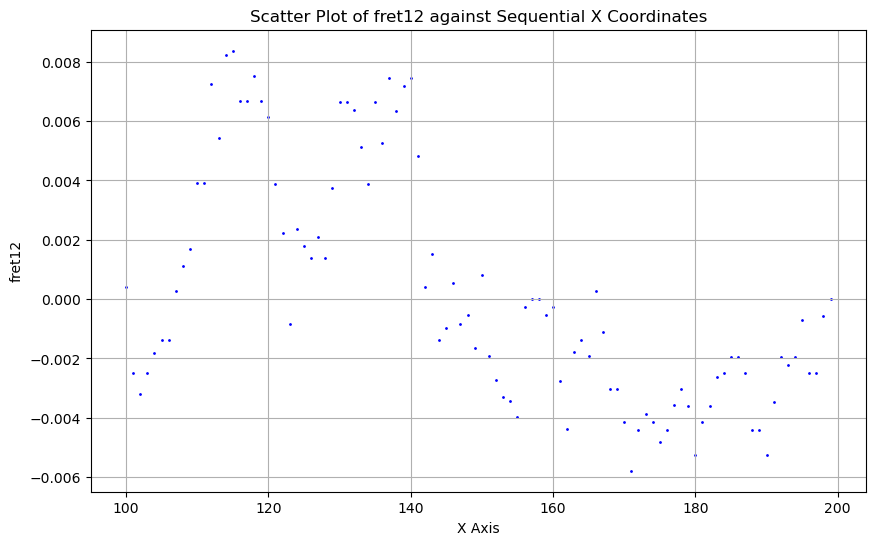

In [27]:
y_values = df['fret12'].tolist()
# y_values = y_values[::10]
x_values = range(0,len(y_values))  
plt.figure(figsize=(10, 6))  # 设置图表大小
plt.scatter(x_values[100:200], y_values[100:200], color='blue',s=1)  # 绘制散点图
plt.xlabel('X Axis')  # 设置x轴标签
plt.ylabel('fret12')  # 设置y轴标签
plt.title('Scatter Plot of fret12 against Sequential X Coordinates')  # 设置图表标题
plt.grid(True)  # 显示网格
# plt.xticks(x_values)  # 确保x轴显示指定的刻度
plt.show()  # 显示图表

In [2]:
###归一化的代码
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 假设df是你的DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
})

# 初始化MinMaxScaler
scaler = MinMaxScaler()

# 对'A'列进行归一化
df['A_normalized'] = scaler.fit_transform(df[['A']])

print(df)

   A  B  A_normalized
0  1  5          0.00
1  2  4          0.25
2  3  3          0.50
3  4  2          0.75
4  5  1          1.00


In [5]:
#对单日的diff类特征的挖掘
#diff类特征,(A-B)/(A+B)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
df = pd.read_csv(path)
df =dealDataFrame(df)
column_name = df.columns[3:]
corr = {}
for i in range(len(column_name)):
        for j in range(i + 1, len(column_name)):
            corr["diff("+column_name[i]+"-"+column_name[j]+")"] = 0
            
for i in range(len(column_name)):
        for j in range(i + 1, len(column_name)):
            feature = (df[column_name[i]]-df[column_name[j]])/ (df[column_name[i]]+df[column_name[j]])
            corr["diff("+column_name[i]+"-"+column_name[j]+")"] = df["fret12"].corr(feature)
            

    
correlation_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Correlation with fret12'])
df_sorted = correlation_df.sort_values(by='Correlation with fret12', key = lambda x:x.abs(),ascending=False)
df_sorted.to_csv("20230601-diff-sort.csv")
# with open("20230601-diff-sort.txt","w") as f:
#     max_key_length = 20
#     for key, value in df_sorted.items():
#         f.write(f'{key.ljust(max_key_length)}: {value}\n')


In [8]:
#对所有日期的diff类特征挖掘
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
column_name = df.columns[3:]
corr = {}
for i in range(len(column_name)):
        for j in range(i + 1, len(column_name)):
            corr["diff("+column_name[i]+"-"+column_name[j]+")"] = 0

date_range = c.range(20230601, 20231130)
for date in date_range:
    path = "../dataset/csv/" + str(date) + ".csv"
    df = pd.read_csv(path)
    df = dealDataFrame(df)
    for i in range(len(column_name)):
        for j in range(i + 1, len(column_name)):
            feature = (df[column_name[i]]-df[column_name[j]])/ (df[column_name[i]]+df[column_name[j]])
            corr["diff("+column_name[i]+"-"+column_name[j]+")"] += df["fret12"].corr(feature)
for name in corr:
    corr[name] = corr[name]/len(date_range)

correlation_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Correlation with fret12'])
df_sorted = correlation_df.sort_values(by='Correlation with fret12', key = lambda x:x.abs(),ascending=False)
df_sorted.to_csv("corr-all-diff-sort.csv")     


In [2]:
### 对文章中提到的feature进行测试
# ask0/bid0 - 1
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
column_name = df.columns[3:]
corr = {}
df["ask0-bid0-1"] = df["ask0"]/df["bid0"]-1
corr = df["fret12"].corr(df["ask0-bid0-1"])
print("corr = ",corr)

corr =  0.01603594124980799


In [3]:
#wap
#(ask)
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
column_name = df.columns[3:]
corr = {}
df["wap0"] = (df["bid0"]*df["asize0"]+df["ask0"]*df["bsize0"])/(df["bsize0"]+df["asize0"])
corr = df["fret12"].corr(df["wap1"])
print("corr = ",corr)

corr =  0.008736200937915928


In [5]:
date = 20230601
path = "../dataset/csv/" + str(date) + ".csv"
column_name = df.columns[3:]
corr = {}
df["wap1"] = (df["bid0"]*df["bsize0"]+df["ask0"]*df["asize0"])/(df["bsize0"]+df["asize0"])
corr = df["fret12"].corr(df["wap1"])
print("corr = ",corr)
print(df["wap1"].head())

corr =  0.008732079290344056
0    34.999697
1    35.141599
2    35.235735
3    35.274000
4    35.239512
Name: wap1, dtype: float64


In [16]:
print((20230601+4)%7+1)
df["new"] = df["interval"]/1000000-93
print(df["new"].head(80))
for data in df["new"]:
    print(data)

4
0      0.0
1      0.1
2      0.2
3      0.3
4      0.4
      ... 
75    11.5
76    11.6
77    11.7
78    11.8
79    11.9
Name: new, Length: 80, dtype: float64
0.0
0.09999999999999432
0.20000000000000284
0.29999999999999716
0.4000000000000057
0.5
0.5999999999999943
0.7000000000000028
0.7999999999999972
0.9000000000000057
1.0
1.0999999999999943
1.2000000000000028
1.2999999999999972
1.4000000000000057
1.5
1.5999999999999943
1.7000000000000028
1.7999999999999972
1.9000000000000057
2.0
2.0999999999999943
2.200000000000003
2.299999999999997
2.4000000000000057
2.5
2.5999999999999943
2.700000000000003
2.799999999999997
2.9000000000000057
7.0
7.099999999999994
7.200000000000003
7.299999999999997
7.400000000000006
7.5
7.599999999999994
7.700000000000003
7.799999999999997
7.900000000000006
8.0
8.099999999999994
8.200000000000003
8.299999999999997
8.400000000000006
8.5
8.599999999999994
8.700000000000003
8.799999999999997
8.900000000000006
9.0
9.099999999999994
9.200000000000003
9.29999999999999